In [1]:
from glob import glob
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
import itertools
import re
import os
import string
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from IPython.display import Image
from math import ceil
import seaborn as sns
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
import os
import random
import re
import nltk
import time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest , f_classif
from tqdm import tqdm as t
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords

In [3]:
import seaborn as sns
from tqdm import tqdm_notebook

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from scipy.sparse import hstack, vstack

from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import textblob
import string

In [4]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import strip_tags
from gensim.parsing.preprocessing import strip_multiple_whitespaces
import spacy
import en_core_web_sm
from spacy.lang.en import English
en_core_web_sm.load()
from  spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords


In [5]:
# printing the list directory to see what is avalable in aclImdb
print(os.listdir('C:/Users/Neha Maiya/reviews/aclImdb'))

['aclImdb', 'imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']


In [6]:
PATH = 'C:/Users/Neha Maiya/reviews/aclImdb' 

In [7]:
import sys
sys.getdefaultencoding()

'utf-8'

In [8]:
#Separating train files to positive and negative
posFiles = [x for x in os.listdir(PATH+"/train/pos/") if x.endswith(".txt")]
negFiles = [x for x in os.listdir(PATH+"/train/neg/") if x.endswith(".txt")]

In [9]:
#Separating test files to positive and negative
test_pos_Files= [x for x in os.listdir(PATH+"/test/pos/") if x.endswith(".txt")]
test_neg_Files=[x for x in os.listdir(PATH+"/test/neg/") if x.endswith(".txt")]  

In [10]:
P_train=[]
N_train=[]

for nfile in negFiles:
    with open(PATH+"/train/neg/"+nfile, encoding="utf-8") as f:
        N_train.append(f.read())
for pfile in posFiles:
    with open(PATH+"/train/pos/"+pfile, encoding="utf-8") as f:
        P_train.append(f.read())


In [11]:
P_test=[]
N_test=[]
for ptestfile in test_pos_Files:
    with open(PATH+"/test/pos/"+ptestfile, encoding="utf-8") as f:
        P_test.append(f.read())
for ntestfile in test_neg_Files:
    with open(PATH+"/test/neg/"+ntestfile, encoding="utf-8") as f:
        N_test.append(f.read())

In [12]:
#  concatenating positive and negative files together in reviews_train
reviews_train = pd.concat([
    pd.DataFrame({"review":P_train, "Label":1, "file":posFiles}),
    pd.DataFrame({"review":N_train, "Label":-1, "file":negFiles})
], ignore_index=True).sample(frac=1, random_state=1)
reviews_train.head()


,review,Label,file
21492,"I have copy of this on VHS, I think they (The ...",-1,6844_1.txt
9488,After several extremely well ratings to the po...,1,7290_10.txt
16933,I still don't know why I forced myself to sit ...,-1,2740_1.txt
12604,Mt little sister and I are self-proclaimed hor...,-1,10094_1.txt
8222,I have personally seen many Disney movies in m...,1,6150_7.txt


In [13]:
# change_names_test = reviews_test.columns.tolist()
# change_names_test[change_names_test.index('Sentiment')] = 'Sentiment_Test'
# reviews_test.columns = change_names_test

In [14]:
#concatenating positive and negative files together in reviews_test
reviews_test = pd.concat([
    pd.DataFrame({"review":P_test, "Label":1, "file":test_pos_Files}),
    pd.DataFrame({"review":N_test, "Label":-1,"file":test_neg_Files})
], ignore_index=True).sample(frac=1, random_state=1)
reviews_test.head()

,review,Label,file
21492,A movie theater with a bad history of past gru...,-1,6844_2.txt
9488,"""Here On Earth"" is a surprising beautiful roma...",1,7290_10.txt
16933,I just watched Descent. Gawds what an awful mo...,-1,2740_3.txt
12604,In a nutshell the movie is about a gang war in...,-1,10094_4.txt
8222,"Instead of watching the recycled history of ""P...",1,6150_7.txt


In [15]:
reviews_test.head(10)

,review,Label,file
21492,A movie theater with a bad history of past gru...,-1,6844_2.txt
9488,"""Here On Earth"" is a surprising beautiful roma...",1,7290_10.txt
16933,I just watched Descent. Gawds what an awful mo...,-1,2740_3.txt
12604,In a nutshell the movie is about a gang war in...,-1,10094_4.txt
8222,"Instead of watching the recycled history of ""P...",1,6150_7.txt
9110,"This is an incredibly compelling story, told w...",1,6950_10.txt
21196,"I like underdogs. So, 12 years after having fi...",-1,6578_4.txt
17193,"Okay, so I'm Singaporean and I would like to s...",-1,2975_2.txt
23846,**** MILD SPOILERS _ BUT YOU PROBABLY KNOW THE...,-1,8963_4.txt
10415,Bedrooms and Hallways gives its audience a loo...,1,8124_8.txt


In [16]:
reviews_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 21492 to 235
Data columns (total 3 columns):
review    25000 non-null object
Label     25000 non-null int64
file      25000 non-null object
dtypes: int64(1), object(2)
memory usage: 781.2+ KB


In [17]:
reviews_train.describe()

,Label
count,25000.00000
mean,0.00000
std,1.00002
min,-1.00000
25%,-1.00000
50%,0.00000
75%,1.00000
max,1.00000


In [18]:
reviews_train.shape

(25000, 3)

In [19]:
reviews_train['Label'].value_counts()

-1    12500
 1    12500
Name: Label, dtype: int64

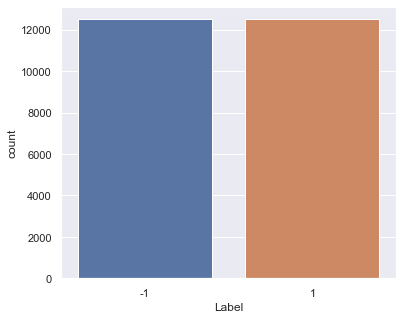

In [20]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(reviews_train['Label'])

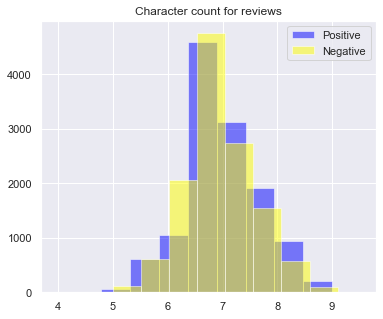

In [21]:
#character count
reviews_train[reviews_train['Label']==1]['review'].apply(lambda y: np.log1p(len(y))).hist(alpha=0.5, color='blue', label='Positive')
reviews_train[reviews_train['Label']==-1]['review'].apply(lambda y: np.log1p(len(y))).hist(alpha=0.5, color='yellow', label='Negative')
plt.title('Character count for reviews')
plt.legend();
# alpha is for the darkness of color

In [22]:
# here we can find if there are any missing data and no missing data
reviews_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 21492 to 235
Data columns (total 3 columns):
review    25000 non-null object
Label     25000 non-null int64
file      25000 non-null object
dtypes: int64(1), object(2)
memory usage: 781.2+ KB


In [23]:
reviews_test.shape

(25000, 3)

In [24]:
reviews_test['Label'].unique()

array([-1,  1], dtype=int64)

In [25]:
stopWords = stopwords.words('english')

In [26]:
#snowballstemmer = SnowballStemmer('english')

In [27]:
lemmatizer = WordNetLemmatizer()


In [28]:
#Data preprocessing
#Here we remove html tags, urls, special characters,Lemmanatize- 
#which is better than stemmng as it gives a proper word after cutting
def rmvhtmltags(text):
    remreg = re.compile('<.*?>')
    cleartext = re.sub(remreg, '', text)
    return text

def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def rmvspclcharacter(text):
    clearspcl = re.sub(r'[^A-Za-z0-9\s.]', r'', str(text).lower())
    clearspcl = re.sub(r'\n', r' ', text)    
    clearspcl = " ".join([word for word in text.split() if word not in stopWords])
    return text

def stemming_text(text):
    stemmed_words = [snowballstemmer.stem(word) for word in text.split()]
    return('  '.join(stemmed_words))
    
def lemmatize_words(text):
    lemmatized_words = [lemmatizer.lemmatize(word, 'v') for word in text.split()]
    return('  '.join(lemmatized_words))

In [29]:
# A function dataprocessing is defined where all other functions are included
def dataprocessing(x):
    x = rmvhtmltags(x)
    x = remove_urls(x)
    x = x.lower()
    x = rmvspclcharacter(x)
    x = remove_stopwords(x)
    x = strip_punctuation(x)
    x = strip_multiple_whitespaces(x)
    x = lemmatize_words(x)
    #x = stemming_text(x)
    
    x=' '.join([re.sub(r'\d+', '',i) for i in word_tokenize(x)])
    return x

In [30]:
#before data preprocessing for training datasets
reviews_train['review'][7]

'In this "critically acclaimed psychological thriller based on true events, Gabriel (Robin Williams), a celebrated writer and late-night talk show host, becomes captivated by the harrowing story of a young listener and his adoptive mother (Toni Collette). When troubling questions arise about this boy\'s (story), however, Gabriel finds himself drawn into a widening mystery that hides a deadly secret\x85" according to film\'s official synopsis.<br /><br />You really should STOP reading these comments, and watch the film NOW...<br /><br />The "How did he lose his leg?" ending, with Ms. Collette planning her new life, should be chopped off, and sent to "deleted scenes" land. It\'s overkill. The true nature of her physical and mental ailments should be obvious, by the time Mr. Williams returns to New York. Possibly, her blindness could be in question - but a revelation could have be made certain in either the "highway" or "video tape" scenes. The film would benefit from a re-editing - how a

In [31]:
reviews_train['review'] = reviews_train['review'].map(lambda x: dataprocessing(x))

In [32]:
#after data preprocessing for training datasets
reviews_train['review'][7]

'critically acclaim psychological thriller base true events gabriel robin williams celebrate writer late night talk host captivate harrow story young listener adoptive mother toni collette trouble question arise boy s story however gabriel find draw widen mystery hide deadly secret accord film s official synopsis br br you stop read comment watch film now br br the how lose leg end ms collette plan new life chop off send delete scenes land it s overkill true nature physical mental ailments obvious time mr williams return new york possibly blindness question revelation certain highway video tape scenes film benefit re edit director s cut br br williams bobby cannavale as jess don t seem initially believable couple scene establish relationship help set stage otherwise cast exemplary williams offer exceptionally strong characterization gay impersonation sandra oh as anna joe morton as ashe rory culkin pete logand perfect br br best all collette s donna belong creepy hall fame ms oh correc

In [33]:
#before data preprocessing for testing data
reviews_test['review'][5]

'I saw this film on September 1st, 2005 in Indianapolis. I am one of the judges for the Heartland Film Festival that screens films for their Truly Moving Picture Award. A Truly Moving Picture "...explores the human journey by artistically expressing hope and respect for the positive values of life." Heartland gave that award to this film.<br /><br />This is a story of golf in the early part of the 20th century. At that time, it was the game of upper class and rich "gentlemen", and working people could only participate by being caddies at country clubs. With this backdrop, this based-on-a-true-story unfolds with a young, working class boy who takes on the golf establishment and the greatest golfer in the world, Harry Vardon.<br /><br />And the story is inspirational. Against all odds, Francis Ouimet (played by Shia LaBeouf of "Holes") gets to compete against the greatest golfers of the U.S. and Great Britain at the 1913 U.S. Open. Francis is ill-prepared, and has a child for a caddy. (T

In [34]:
reviews_test['review'] = reviews_test['review'].map(lambda x: dataprocessing(x))

In [35]:
#after data preprocessing for testing datasets
reviews_test['review'][5]

'saw film september st  indianapolis judge heartland film festival screen film truly move picture award truly move picture explore human journey artistically express hope respect positive value life heartland give award film br br this story golf early th century time game upper class rich gentlemen work people participate caddy country club backdrop base on a true story unfold young work class boy take golf establishment greatest golfer world harry vardon br br and story inspirational odds francis ouimet play shia labeouf hole get compete greatest golfers u s great britain  u s open francis ill prepare child caddy the caddy hilarious motivational steal scene appear in despite handicap francis display courage spirit heroism humility world class event br br and learn lot early years golf example use small wooden club layout short hole manual scoreboard golfers swing pip mouth terrible condition green fairways play cancel torrential rain br br this film stun cinematography art direction 

In [36]:
# separating them into lists
y_train_label = reviews_train['Label'].tolist()
x_train_review = reviews_train['review'].tolist()

y_test_label = reviews_test['Label'].tolist()
x_test_review = reviews_test['review'].tolist()

In [37]:
# word cloud after dataprocessing to see positive and negative words
def wc_plot(label, title):
    wordcloud = WordCloud(background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=300,
                          max_font_size=70,
                          random_state=42,
                          width=750,
                          height=500,
                          mask=None)
    wordcloud.generate(str(label))
    plt.figure(figsize=(15.0,10.0))
    plt.axis('off')
    plt.title(title)
    plt.imshow(wordcloud);


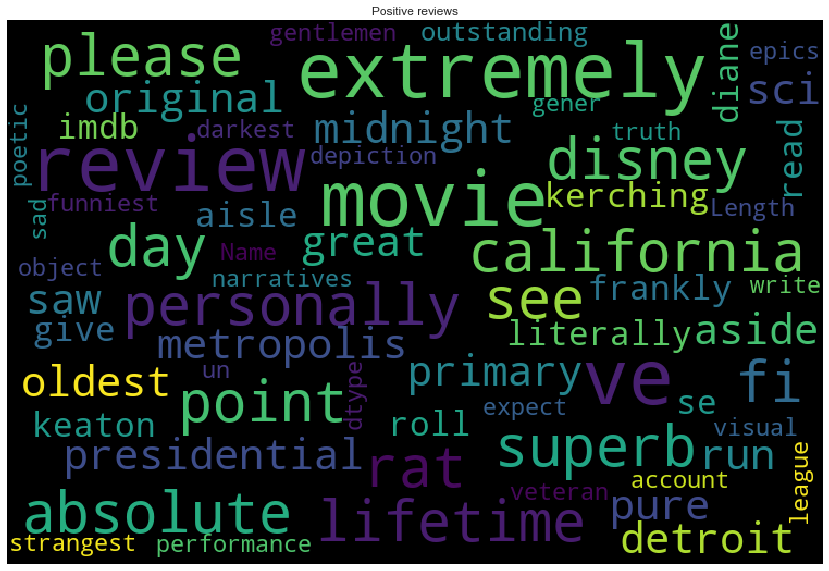

In [38]:
wc_plot(reviews_train[reviews_train['Label']==1]['review'], 'Positive reviews')

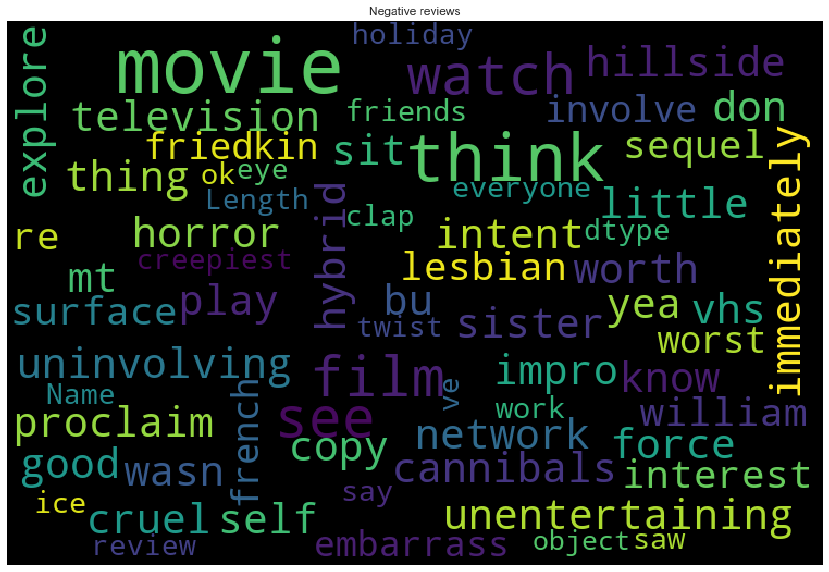

In [39]:
wc_plot(reviews_train[reviews_train['Label']==-1]['review'], 'Negative reviews')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_train_review, y_train_label, test_size=0.3, random_state = 42)

### Logistic regression using cross validation for tfidftransformer + count vectorizer

In [41]:
model = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression()),])
model =model.fit(X_train, y_train)
print("Cross Validation for Logistic regression on Count Vectorizer and TFID Transformer")
cross_val_score(model, X_train, y_train, cv=3)

Cross Validation for Logistic regression on Count Vectorizer and TFID Transformer


array([0.87624272, 0.88136465, 0.87862164])

### Linear SVC(SVM) using cross validation for tfidftransformer + count vectorizer

In [42]:
modelsvm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),])
modelsvm =modelsvm.fit(X_train, y_train)
print("Cross Validation for SVM on Count Vectorizer and TFID Transformer")
cross_val_score(modelsvm, X_train, y_train, cv=3)

Cross Validation for SVM on Count Vectorizer and TFID Transformer


array([0.87829962, 0.88033602, 0.88102177])

### Naive Bayes using cross validation for tfidftransformer + count vectorizer

In [43]:
modelnb = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])
modelnb =modelnb.fit(X_train, y_train)
print("Cross Validation for Naive Bayes on Count Vectorizer and TFID Transformer")
cross_val_score(modelnb, X_train, y_train, cv=3)

Cross Validation for Naive Bayes on Count Vectorizer and TFID Transformer


array([0.85241687, 0.86027773, 0.85547746])

### Random Forest using cross validation for tfidftransformer + count vectorizer

In [44]:
modelrf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier()),])
modelrf =modelrf.fit(X_train, y_train)
print("Cross Validation for Random Forest on Count Vectorizer and TFID Transformer")
cross_val_score(modelrf, X_train, y_train, cv=3)

Cross Validation for Random Forest on Count Vectorizer and TFID Transformer


array([0.74974289, 0.73718498, 0.74987142])

## Logstic, SVM(LinearSVC) and Naive Bayes without hyperparameters tuning

In [45]:
def model_training(training_model,vect_tfidf):
    if training_model == 'LR':
        
        if vect_tfidf == 'BOW':
            print ("Training Logistic regression model using bag of words")
            lrbow = Pipeline([('vect', CountVectorizer()), ('clf', LogisticRegression()),])
            return lrbow
           
        elif vect_tfidf == 'TFIDF':
            print ("Training Logistic regression model using TFIDF")
            lrtfidf = Pipeline([ ('tfidf', TfidfVectorizer()),('clf', LogisticRegression()),])
            return lrtfidf
    
    elif training_model == 'SVM':
        
        if vect_tfidf == 'BOW':
            print ("Training SVM model using bag of words")
            svmbow = Pipeline([('vect', CountVectorizer()), ('clf', LinearSVC()),])
            return svmbow
                        
        elif vect_tfidf == 'TFIDF':
            print ("Training SVM model using TFIDF")
            svmtfidf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC()),])
            return svmtfidf
        
    elif training_model == 'NB':        
        if vect_tfidf == 'BOW':
            print ("Training NB model using bag of words")
            nbbow = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB()),])
            return nbbow
                        
        elif vect_tfidf == 'TFIDF':
            print ("Training NB model using TFIDF")
            nbtfidf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB()),])
            return nbtfidf

In [46]:
def model_fitting_mix():
    training_model = ['LR','SVM','NB']
    vect_tfidf = ['BOW','TFIDF']
    for i in training_model:
        for j in vect_tfidf:
            model_mix = model_training(i,j).fit(X_train, y_train)
            predicted_mix = model_mix.predict(X_test)
            accuracy_mix = np.mean(predicted_mix == y_test)
            scores_mix = cross_val_score(model_mix, X_train, y_train, cv=3)
            print ("Accuracy on testing dataset is",accuracy_mix)
            print("Accuracy on training dataset is : %0.3f" % (scores_mix.mean()))
            


In [47]:
model_fitting_mix()

Training Logistic regression model using bag of words
Accuracy on testing dataset is 0.8696
Accuracy on training dataset is : 0.868
Training Logistic regression model using TFIDF
Accuracy on testing dataset is 0.886
Accuracy on training dataset is : 0.879
Training SVM model using bag of words
Accuracy on testing dataset is 0.8529333333333333
Accuracy on training dataset is : 0.847
Training SVM model using TFIDF
Accuracy on testing dataset is 0.8808
Accuracy on training dataset is : 0.880
Training NB model using bag of words
Accuracy on testing dataset is 0.8548
Accuracy on training dataset is : 0.847
Training NB model using TFIDF
Accuracy on testing dataset is 0.8586666666666667
Accuracy on training dataset is : 0.856


# HyperParameter Tuning

## Logistic Regression with TFIDF

In [48]:
#using 1-gram and bigram
parameters = {"tfidf__min_df": [2, 5], "tfidf__max_df": [0.25, 0.5], "tfidf__ngram_range": [(1, 2)], "clf__C" : [0.1, 1, 10]}

pipeline_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression())])
lrgridsearch = GridSearchCV(pipeline_lr, parameters, cv=3, verbose= 5)
lrgridsearch.fit(X_train, y_train)

y_pred = lrgridsearch.predict(X_test)

print('Best parameters: ', lrgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.852, total=   8.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.855, total=   9.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.5s remaining:    0.0s


[CV] clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.848, total=   8.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.8s remaining:    0.0s


[CV] clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.855, total=   7.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   33.1s remaining:    0.0s


[CV] clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.856, total=   7.1s
[CV] clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.852, total=   7.1s
[CV] clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.845, total=   7.3s
[CV] clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.858, total=   7.4s
[CV] clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.853, total=   7.4s
[CV] clf__C=0.1, tfidf__max_df=0.5, tfidf__min_df=5, tfi

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.9min finished


Best parameters:  {'clf__C': 10, 'tfidf__max_df': 0.25, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Accuracy score:  0.8933333333333333
Precision score:  0.8924617817606747
Recall score:  0.8962413975648491
F1 score:  0.8943475964078182
--------------------------
Confusion Matrix:  [[3314  408]
 [ 392 3386]]


## Logistic regression with Count Vectorizer

In [49]:
#Using BI-gram
parameters = {"vect__min_df": [2, 5], "vect__max_df":[0.25, 0.5], "vect__ngram_range": [(1, 2)], "clf__C": [0.1, 1, 10]}

pipeline_lr = Pipeline([('vect', CountVectorizer()),
                     ('clf', LogisticRegression())])
lrgridsearch = GridSearchCV(pipeline_lr, parameters, cv=3, verbose= 5)
lrgridsearch.fit(X_train, y_train)

y_pred = lrgridsearch.predict(X_test)

print('Best parameters: ', lrgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=0.1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.875, total=   8.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] clf__C=0.1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.882, total=   9.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.8s remaining:    0.0s


[CV] clf__C=0.1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.878, total=   9.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.8s remaining:    0.0s


[CV] clf__C=0.1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.875, total=   7.9s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.8s remaining:    0.0s


[CV] clf__C=0.1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.882, total=   8.5s
[CV] clf__C=0.1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.877, total=   8.6s
[CV] clf__C=0.1, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.877, total=   9.2s
[CV] clf__C=0.1, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.879, total=   9.4s
[CV] clf__C=0.1, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=0.1, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.879, total=  10.0s
[CV] clf__C=0.1, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.8min finished


Best parameters:  {'clf__C': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
Accuracy score:  0.8830666666666667
Precision score:  0.8838317015083356
Recall score:  0.884065643197459
F1 score:  0.883948656874421
--------------------------
Confusion Matrix:  [[3283  439]
 [ 438 3340]]


In the above we can see that logistic regression with tfidf(0.893) has greater accuracy than 
logistic regression with count vectorizer(0.883)

## Naive Bayes with TF-IDF

In [50]:
#we have to find the best parameters for NB
parameters = {"tfidf__min_df": [2, 5], "tfidf__max_df": [0.25, 0.4, 0.5],"tfidf__ngram_range": [(1, 2)], "clf__alpha" : [1,10, 20]}

pipeline_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])
nbgridsearch = GridSearchCV(pipeline_nb, parameters, cv=3, verbose= 5)
nbgridsearch.fit(X_train, y_train)

y_pred = nbgridsearch.predict(X_test)

print('Best parameters: ', nbgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.869, total=   7.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.870, total=   8.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s


[CV] clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.872, total=   7.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.2s remaining:    0.0s


[CV] clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.865, total=   7.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.3s remaining:    0.0s


[CV] clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.868, total=   7.3s
[CV] clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.869, total=   7.2s
[CV] clf__alpha=1, tfidf__max_df=0.4, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.4, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.866, total=   7.3s
[CV] clf__alpha=1, tfidf__max_df=0.4, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.4, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.873, total=   7.2s
[CV] clf__alpha=1, tfidf__max_df=0.4, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=1, tfidf__max_df=0.4, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.872, total=   7.4s
[CV] clf__alpha=1, tfidf__max_df=0.4

[CV] clf__alpha=20, tfidf__max_df=0.4, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=20, tfidf__max_df=0.4, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.851, total=   7.7s
[CV] clf__alpha=20, tfidf__max_df=0.4, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=20, tfidf__max_df=0.4, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.847, total=   7.1s
[CV] clf__alpha=20, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=20, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.834, total=   7.3s
[CV] clf__alpha=20, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=20, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.850, total=   8.3s
[CV] clf__alpha=20, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__alpha=20, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.847, total=   7.4s
[CV] clf__alpha=20, tfidf__max

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  6.8min finished


Best parameters:  {'clf__alpha': 1, 'tfidf__max_df': 0.4, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Accuracy score:  0.8790666666666667
Precision score:  0.8912510220768601
Recall score:  0.8655373213340392
F1 score:  0.8782059889888545
--------------------------
Confusion Matrix:  [[3323  399]
 [ 508 3270]]


## Naive Bayes with Count Vectorizer

In [51]:
#we have to find the best parameters for NB
parameters = {"vect__min_df": [2, 5], "vect__max_df": [0.25, 0.4, 0.5], "vect__ngram_range": [(1, 2)], "clf__alpha" : [1, 10, 20]}

pipeline_nb = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB())])
nbgridsearch = GridSearchCV(pipeline_nb, parameters, cv=3, verbose= 5)
nbgridsearch.fit(X_train, y_train)

y_pred = nbgridsearch.predict(X_test)

print('Best parameters: ', nbgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__alpha=1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.862, total=   7.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV] clf__alpha=1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.871, total=   7.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s remaining:    0.0s


[CV] clf__alpha=1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.863, total=   7.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.2s remaining:    0.0s


[CV] clf__alpha=1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.857, total=   7.4s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.8s remaining:    0.0s


[CV] clf__alpha=1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.861, total=   7.0s
[CV] clf__alpha=1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.859, total=   7.2s
[CV] clf__alpha=1, vect__max_df=0.4, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.4, vect__min_df=2, vect__ngram_range=(1, 2), score=0.863, total=   7.1s
[CV] clf__alpha=1, vect__max_df=0.4, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.4, vect__min_df=2, vect__ngram_range=(1, 2), score=0.870, total=   7.6s
[CV] clf__alpha=1, vect__max_df=0.4, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=1, vect__max_df=0.4, vect__min_df=2, vect__ngram_range=(1, 2), score=0.865, total=   7.2s
[CV] clf__alpha=1, vect__max_df=0.4, vect__min_df=5, vect__ngram_r

[CV]  clf__alpha=20, vect__max_df=0.4, vect__min_df=5, vect__ngram_range=(1, 2), score=0.853, total=   7.6s
[CV] clf__alpha=20, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=20, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.854, total=   8.2s
[CV] clf__alpha=20, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=20, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.859, total=   8.3s
[CV] clf__alpha=20, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=20, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.855, total=   7.6s
[CV] clf__alpha=20, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=20, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2), score=0.852, total=   8.2s
[CV] clf__alpha=20, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=20, vect__max_df=0.5, vect__min_df=5, vect_

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  7.0min finished


Best parameters:  {'clf__alpha': 1, 'vect__max_df': 0.4, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
Accuracy score:  0.8736
Precision score:  0.8838849701573521
Recall score:  0.8623610375860243
F1 score:  0.8729903536977492
--------------------------
Confusion Matrix:  [[3294  428]
 [ 520 3258]]


In the above we can see that Naive Bayes with tfidf(0.878) has greater accuracy than Naive Bayes  with count vectorizer(0.873)

## SVM (Linear SVC) with TF-IDF

In [52]:
#we have to find the best parameters for NB
parameters = {"tfidf__min_df": [2,5], "tfidf__max_df": [0.25, 0.5], "tfidf__ngram_range": [(1, 2)], "clf__C" : [10, 100,500]}

pipeline_svm = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])
svmgridsearch = GridSearchCV(pipeline_svm, parameters, cv=3, verbose= 5)
svmgridsearch.fit(X_train, y_train)

y_pred = svmgridsearch.predict(X_test)

print('Best parameters: ', svmgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=10, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.887, total=  10.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] clf__C=10, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.887, total=  10.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.6s remaining:    0.0s


[CV] clf__C=10, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.25, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.886, total=   8.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.4s remaining:    0.0s


[CV] clf__C=10, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.878, total=   7.5s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   37.0s remaining:    0.0s


[CV] clf__C=10, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.873, total=   8.2s
[CV] clf__C=10, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.25, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.876, total=   8.1s
[CV] clf__C=10, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.889, total=   8.9s
[CV] clf__C=10, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.889, total=  11.3s
[CV] clf__C=10, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__C=10, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.885, total=  10.6s
[CV] clf__C=10, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_r

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  6.9min finished


Best parameters:  {'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Accuracy score:  0.8862666666666666
Precision score:  0.8865979381443299
Recall score:  0.8877713075701429
F1 score:  0.8871842348895648
--------------------------
Confusion Matrix:  [[3293  429]
 [ 424 3354]]


## Linear SVC with Count Vectorizer

In [53]:
#we have to find the best parameters for NB
parameters = {"vect__min_df": [2, 5], "vect__max_df": [0.25, 0.5], "vect__ngram_range": [(1, 2)], "clf__C" : [10, 100,500]}

pipeline_svm = Pipeline([('vect', CountVectorizer()),
                     ('clf', LinearSVC())])
svmgridsearch = GridSearchCV(pipeline_svm, parameters, cv=3, verbose= 5)
svmgridsearch.fit(X_train, y_train)

y_pred = svmgridsearch.predict(X_test)

print('Best parameters: ', svmgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=10, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.869, total=  11.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] clf__C=10, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.867, total=  11.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.7s remaining:    0.0s


[CV] clf__C=10, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.25, vect__min_df=2, vect__ngram_range=(1, 2), score=0.872, total=  11.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.4s remaining:    0.0s


[CV] clf__C=10, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.862, total=   8.9s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   43.4s remaining:    0.0s


[CV] clf__C=10, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.856, total=   9.1s
[CV] clf__C=10, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.25, vect__min_df=5, vect__ngram_range=(1, 2), score=0.862, total=  10.2s
[CV] clf__C=10, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.871, total=  12.0s
[CV] clf__C=10, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.867, total=  10.4s
[CV] clf__C=10, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.871, total=  10.4s
[CV] clf__C=10, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__C=10, vec

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.9min finished


Best parameters:  {'clf__C': 10, 'vect__max_df': 0.5, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
Accuracy score:  0.8750666666666667
Precision score:  0.8772908366533865
Recall score:  0.8742721016410799
F1 score:  0.875778867824473
--------------------------
Confusion Matrix:  [[3260  462]
 [ 475 3303]]


In the above we can see that Linear SVC with tfidf(0.886) has greater accuracy than Linear SVC with count vectorizer(0.875)

## Random Forest with TF-IDF

In [54]:

#we have to find the best parameters
parameters = {"tfidf__min_df": [2, 5],"tfidf__max_df":[0.2, 0.5] ,"tfidf__ngram_range": [(1, 2)], "clf__n_estimators" : [50, 100, 200], "clf__max_depth": [100, 1000]}

pipeline_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])
rfgridsearch = GridSearchCV(pipeline_rf, parameters, cv=3, verbose=5)
rfgridsearch.fit(X_train, y_train)

y_pred = rfgridsearch.predict(X_test)
print('Best parameters: ', rfgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.832, total=  19.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.836, total=  20.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.4s remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.834, total=  21.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.840, total=  15.5s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.838, total=  16.4s
[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.834, total=  15.9s
[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.831, total=  21.4s
[CV] clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, tfidf__max_df=0.5, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.836, total=  21.7s
[CV] clf

[CV]  clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.834, total=  22.8s
[CV] clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.828, total=  23.0s
[CV] clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=2, tfidf__ngram_range=(1, 2), score=0.828, total=  23.5s
[CV] clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.832, total=  16.6s
[CV] clf__max_depth=1000, clf__n_estimators=50, tfidf__max_df=0.2, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 


[CV] clf__max_depth=1000, clf__n_estimators=200, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=200, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.844, total=  44.6s
[CV] clf__max_depth=1000, clf__n_estimators=200, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=200, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.852, total=  50.4s
[CV] clf__max_depth=1000, clf__n_estimators=200, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=200, tfidf__max_df=0.5, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.849, total=  50.7s


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 42.4min finished


Best parameters:  {'clf__max_depth': 100, 'clf__n_estimators': 200, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Accuracy score:  0.86
Precision score:  0.8676549865229111
Recall score:  0.8520381154049762
F1 score:  0.859775641025641
--------------------------
Confusion Matrix:  [[3231  491]
 [ 559 3219]]


## Random Forest with Count Vectorizer

In [55]:

#we have to find the best parameters
parameters = {"vect__min_df": [2, 5], "vect__max_df": [0.2, 0.5], "vect__ngram_range": [(1, 2)], "clf__n_estimators" : [50, 100, 200], "clf__max_depth": [100, 1000]}

pipeline_rf = Pipeline([('vect', CountVectorizer()),
                     ('clf', RandomForestClassifier())])
rfgridsearch = GridSearchCV(pipeline_rf, parameters, cv=3, verbose=5)
rfgridsearch.fit(X_train, y_train)

y_pred = rfgridsearch.predict(X_test)
print('Best parameters: ', rfgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2), score=0.832, total=  21.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.0s remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2), score=0.839, total=  23.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.6s remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2), score=0.837, total=  23.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2), score=0.831, total=  17.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s


[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2), score=0.835, total=  16.3s
[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2), score=0.837, total=  14.8s
[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.834, total=  19.7s
[CV] clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100, clf__n_estimators=50, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), score=0.833, total=  20.7s
[CV] clf__max_depth=100, clf__n_

[CV]  clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2), score=0.835, total=  22.1s
[CV] clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=2, vect__ngram_range=(1, 2), score=0.842, total=  22.1s
[CV] clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2), score=0.826, total=  14.6s
[CV] clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2), score=0.840, total=  17.0s
[CV] clf__max_depth=1000, clf__n_estimators=50, vect__max_df=0.2, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=100

[CV]  clf__max_depth=1000, clf__n_estimators=200, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2), score=0.859, total=  51.0s
[CV] clf__max_depth=1000, clf__n_estimators=200, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2) 
[CV]  clf__max_depth=1000, clf__n_estimators=200, vect__max_df=0.5, vect__min_df=5, vect__ngram_range=(1, 2), score=0.851, total=  50.4s


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 44.1min finished


Best parameters:  {'clf__max_depth': 100, 'clf__n_estimators': 200, 'vect__max_df': 0.5, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
Accuracy score:  0.8625333333333334
Precision score:  0.8651954267482053
Recall score:  0.8613022763366861
F1 score:  0.863244462130256
--------------------------
Confusion Matrix:  [[3215  507]
 [ 524 3254]]


In the above we can see that Random Forest with tfidf(0.86) has lesser accuracy than Random Forest with count vectorizer(0.862), thats really a minute difference
Only in Random Forest Count Vectorizer acts better that tfidf

In [56]:
from matplotlib.pyplot import*
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 8 artists>

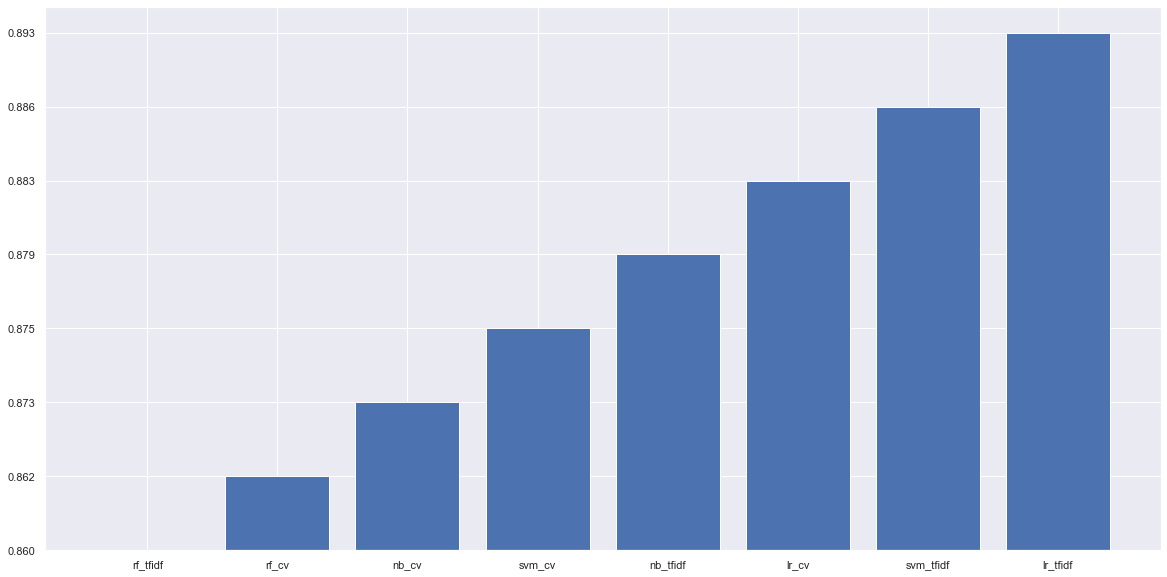

In [57]:
ax = plt.subplots(1, 1, figsize=(20, 10))
accuracy_d =  ['0.860','0.862','0.873','0.875','0.879','0.883','0.886','0.893']
model_names = ['rf_tfidf','rf_cv','nb_cv','svm_cv','nb_tfidf','lr_cv', 'svm_tfidf','lr_tfidf']
matplotlib.pyplot.bar(model_names, accuracy_d, width=0.8, bottom=None,  align='center', data=None)

# Final Selected Model
### From 8 models, we can see Logistic regression with tfidf has the best accuracy so we consider this as our best model

Logistic Regression: C = 10
TF-IDF: min_df = 2, ngram_range = (1 ,2)

In [58]:

final_model_pipeline = Pipeline([('tfidf', TfidfVectorizer(min_df = 2, max_df = 0.25, ngram_range=(1, 2))),
                     ('clf', LogisticRegression(C=10))])
final_model_pipeline.fit(x_train_review, y_train_label)

y_pred1 = final_model_pipeline.predict(x_test_review)

print('Accuracy score: ', format(accuracy_score(y_test_label, y_pred1)))
print('Precision score: ', format(precision_score(y_test_label, y_pred1)))
print('Recall score: ', format(recall_score(y_test_label, y_pred1)))
print('F1 score: ', format(f1_score(y_test_label, y_pred1)))
print('--------------------------')
print('Confusion Matrix: ',confusion_matrix(y_test_label, y_pred1))


Accuracy score:  0.88524
Precision score:  0.8892571336189475
Recall score:  0.88008
F1 score:  0.8846447669977081
--------------------------
Confusion Matrix:  [[11130  1370]
 [ 1499 11001]]


Final model accuracy of Logistic Regression with testing datasets is 0.88524 accuracy which is displayed with Precision score, recall score, F1 score and representation of confusion matrix

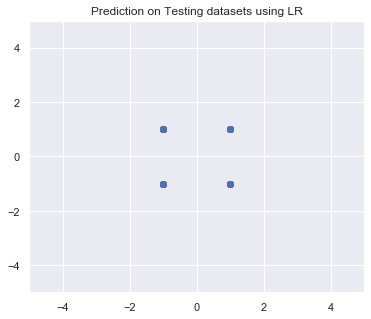

In [60]:
import matplotlib.pyplot as plt

plt.scatter(x=y_pred1, y=y_test_label)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title('Prediction on Testing datasets using LR')
plt.show()